In [ ]:
include("schelling_trinary_subfunctions.jl")
import ColorSchemes.hawaii
using StatsBase, SpecialFunctions
using Plots
gr()

In [7]:
function run_schelling_sim()
    lattice_length = 60
    frac_red_agents = 0.33
    frac_blue_agents = 0.33
    num_simulation_steps = 1000
    num_burnin_steps = 100
    utility_function_blue = 6 * [0, 0.1, 0.1, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8] .+ 1
    utility_function_red = 0 * [0, 0.0, 0.0, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8]
    bin_length = 5
    num_snapshots = 10

    num_steps_per_snapshot = Int(num_simulation_steps/num_snapshots)
    num_red_total = Int(round(frac_red_agents * (lattice_length^2)))
    num_blue_total = Int(round(frac_blue_agents * (lattice_length^2)))
    lattice, locs =
        initialize_lattice(lattice_length, num_red_total, num_blue_total)
    lattice_snapshots = zeros(Int8,size(lattice,1),size(lattice,2),num_snapshots)
    num_empties = length(locs) - num_red_total - num_blue_total
    bins, bin_IDs = initialize_bins(lattice, lattice_length, bin_length)
    counts_joint = zeros(bin_length^2 + 1, bin_length^2 + 1)
    for step = 1:num_burnin_steps
        lattice, locs = step_schelling(
            utility_function_blue,
            utility_function_red,
            lattice,
            lattice_length,
            locs,
            num_blue_total,
            num_red_total,
            num_empties,
        )
    end
    for step = 1:num_simulation_steps
        lattice, locs = step_schelling(
            utility_function_blue,
            utility_function_red,
            lattice,
            lattice_length,
            locs,
            num_blue_total,
            num_red_total,
            num_empties,
        )
        update_counts_joint!(lattice, bins, bin_IDs, counts_joint)
        if mod(step,num_steps_per_snapshot)==0
            lattice_snapshots[:,:,Int(step/num_steps_per_snapshot)] = lattice
        end
    end
    return counts_joint, lattice_snapshots,utility_function_blue,utility_function_red
end

counts_joint, lattice_snapshots, utility_function_blue, utility_function_red = run_schelling_sim()


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 388.0 331.0 … 0.0 0.0; 254.0 0.0 … 0.0 0.0], Int8[2 2 … 0 2; 0 2 … 2 1; … ; 0 2 … 2 2; 0 0 … 0 0]

Int8[1 1 … 1 1; 1 1 … 1 1; … ; 2 0 … 2 1; 2 2 … 1 1]

Int8[2 1 … 2 0; 1 2 … 1 2; … ; 1 1 … 0 0; 2 1 … 0 1]

Int8[0 0 … 1 1; 0 0 … 1 2; … ; 2 0 … 0 0; 2 2 … 1 0]

Int8[2 0 … 0 0; 2 0 … 2 2; … ; 0 0 … 0 1; 0 1 … 0 0]

Int8[0 0 … 2 0; 2 2 … 0 0; … ; 1 2 … 1 1; 2 0 … 2 1]

Int8[0 0 … 1 2; 0 0 … 0 1; … ; 2 1 … 2 2; 2 2 … 0 2]

Int8[0 0 … 0 2; 0 0 … 2 2; … ; 2 0 … 0 0; 2 0 … 0 2]

Int8[2 2 … 2 0; 0 2 … 1 0; … ; 0 0 … 0 2; 0 0 … 0 2]

Int8[1 2 … 1 0; 2 0 … 1 1; … ; 1 1 … 1 1; 1 0 … 1 1], [1.0, 1.6, 1.6, 1.6, 3.4000000000000004, 4.0, 4.6, 5.199999999999999, 5.800000000000001], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

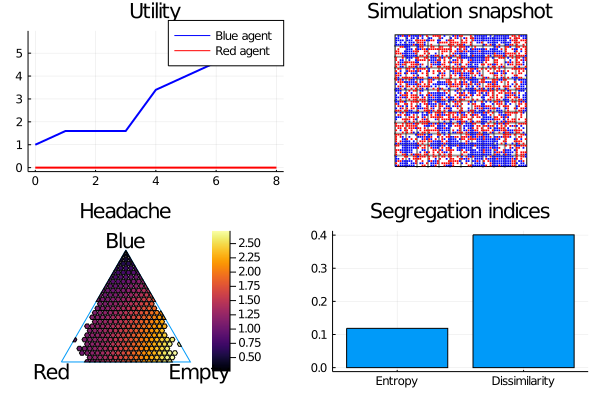

In [8]:
include("schelling_trinary_statistics.jl")

function utility_function_plots_plots(utility_function_blue,utility_function_red)
    plot([0:8],[utility_function_blue,utility_function_red],
        label = ["Blue agent" "Red agent"],
        linewidth = 2,
        linecolor = [:blue :red],
        legend = :best,
    )
end

function lattice_heatmap_plots(lattice)
    heatmap(lattice, aspect_ratio = 1,
        # axis = nothing,
        framestyle = :none
        )
end

function lattice_scatter_plots(lattice,counts_joint)
    lattice_length = size(lattice,1)
    p = plot([0.5;lattice_length+0.5;lattice_length+0.5;0.5;0.5],[0.5;0.5;lattice_length+0.5;lattice_length+0.5;0.5],
        framestyle = :none,
        aspect_ratio = 1,
        line = :black
        )
    bin_length = Int(sqrt(size(counts_joint,1)-1))
    num_lines = Int((lattice_length/bin_length) - 1)
    for i=1:num_lines
        coord = (i)*bin_length+0.5
        plot!(p,[0, lattice_length],[coord, coord],
            linecolor = :yellow,
            linewidth = 2
            )
        plot!(p,[coord, coord],[0, lattice_length],
            linecolor = :yellow,
            linewidth = 2
            )
    end
    blue_locs = findall(x->x==1,lattice)
    # blue_locs = blue_locs[1:10]
    blue_locs_x = [loc[1] for loc in blue_locs]
    blue_locs_y = [loc[2] for loc in blue_locs]
    scatter!(p,blue_locs_x,blue_locs_y,
        markersize = 0.75,
        markercolor = :blue,
        markerstrokewidth = 0
        # markerstrokecolor = :none
        )
    # for loc in blue_locs
    #     scatter!(p,[loc[1]],[loc[2]],
    #         markersize = 1,
    #         markercolor = :blue
    #         )
    # end
    red_locs = findall(x->x==2,lattice)
    # blue_locs = blue_locs[1:10]
    red_locs_x = [loc[1] for loc in red_locs]
    red_locs_y = [loc[2] for loc in red_locs]
    scatter!(p,red_locs_x,red_locs_y,
        markersize = 0.75,
        markercolor = :red,
        markerstrokewidth = 0
        )
    # red_locs = findall(x->x==2,lattice)
    # for loc in red_locs
    #     scatter!(p,loc[1],loc[2])
    # end
    p
    # hlines_x = repeat([0; lattice_length],outer = [1,num_lines])
    # hlines_y = repeat([0:bin_length:lattice_length],outer = [2,1])
    # p = vline([0:bin_length:size(lattice,2)],
    # hline!([0:bin_length:size(lattice,1)],
    #     line = :black
    #     )
    # # heatmap(lattice, aspect_ratio = 1,
    #     # axis = nothing,
    #     framestyle = :none
    #     )
end

function lattice_shape_plots(lattice,counts_joint)
    lattice_length = size(lattice,1)
    p = plot([0.5;lattice_length+0.5;lattice_length+0.5;0.5;0.5],[0.5;0.5;lattice_length+0.5;lattice_length+0.5;0.5],
        framestyle = :none,
        aspect_ratio = 1,
        line = :black,
        hover = false,
        legend = false
        )
    bin_length = Int(sqrt(size(counts_joint,1)-1))
    num_lines = Int((lattice_length/bin_length) - 1)
    for i=1:num_lines
        coord = (i)*bin_length+0.5
        plot!(p,[0, lattice_length],[coord, coord],
            linecolor = :black,
            linewidth = 2,
            hover = false,
            alpha = 0.4,
            legend = false
            )
        plot!(p,[coord, coord],[0, lattice_length],
            linecolor = :black,
            linewidth = 2,
            hover = false,
            alpha = 0.4,
            legend = false
            )
    end

    blue_locs = findall(x->x==1,lattice)
    red_locs = findall(x->x==2,lattice)

    sz = 0.4
    blue_vertices_x = [[(loc[1]-sz), (loc[1]+sz), (loc[1]+sz),(loc[1]-sz),NaN]  for loc in blue_locs]
    blue_vertices_y = [[(loc[2]-sz), (loc[2]-sz), (loc[2]+sz),(loc[2]+sz),NaN]  for loc in blue_locs]
    blue_vertices_x = reduce(vcat,blue_vertices_x)
    blue_vertices_y = reduce(vcat,blue_vertices_y)
    plot!(blue_vertices_x,blue_vertices_y,seriestype = :shape,
        hover = nothing,
        fillcolor = :blue,
        linewidth = 0,
        legend = false
        )

    red_vertices_x = [[(loc[1]-sz), (loc[1]+sz), (loc[1]+sz),(loc[1]-sz),NaN]  for loc in red_locs]
    red_vertices_y = [[(loc[2]-sz), (loc[2]-sz), (loc[2]+sz),(loc[2]+sz),NaN]  for loc in red_locs]
    red_vertices_x = reduce(vcat,red_vertices_x)
    red_vertices_y = reduce(vcat,red_vertices_y)
    plot!(red_vertices_x,red_vertices_y,seriestype = :shape,
        hover = nothing,
        fillcolor = :red,
        linewidth = 0,
        legend = false
        )
    p

end

function headache_plot_plots(counts_joint)
    #a is the top,
    #b is the bottom-left
    #c is the bottom-right

    H = calculate_H_trinary_function(counts_joint)
    data_arr = H
    a_label = "Blue"
    b_label = "Red"
    c_label = "Empty"

    max_occupancy = size(data_arr,1)-1;
    joint_density = [];
    data_vect = Array{Float64,1}(undef,0);
    for r = 1:size(data_arr,1)
        for c = 1:size(data_arr,2)
            if ~isnan(data_arr[r,c])
                joint_density = cat(joint_density,[r-1 c-1],dims = 1);
                append!(data_vect,[data_arr[r,c]]);
            end
        end
    end
    joint_frac = joint_density./max_occupancy;
    empty_frac = 1 .- joint_frac[:,1] .- joint_frac[:,2];
    delta_frac = 1/(max_occupancy);
    p = plot([0,0.5,1,0],[0,sin(pi/3),0,0],legend = false,
        aspect_ratio =  1,
        axis = nothing,
        grid = false,
        framestyle = :none,
        colorbar_entry = false,
        hover = false,
        colorbar = true
        )
    text_shift = 0.075
    annotate!(p,0-text_shift,0-text_shift,b_label,hover = false,colorbar = true)
    annotate!(p,0.5,sin(pi/3)+text_shift,a_label,hover = false,colorbar = true)
    annotate!(p,1+text_shift,0-text_shift,c_label,hover = false,colorbar = true)
    x_coords_all = Array{Float64,1}(undef,0)
    y_coords_all = Array{Float64,1}(undef,0)
    for i = 1:length(data_vect)
        a_coords =  [joint_frac[i,1]+delta_frac/2; #top-left
            joint_frac[i,1]+delta_frac/2; #top-right
            joint_frac[i,1]; #right
            joint_frac[i,1]-delta_frac/2; #bottom-right
            joint_frac[i,1]-delta_frac/2; #bottom-left
            joint_frac[i,1]; #left
            joint_frac[i,1]+delta_frac/2] #top-left
        b_coords = [joint_frac[i,2];#top-left
            joint_frac[i,2]-delta_frac/2;#top-right
            joint_frac[i,2]-delta_frac/2;#right
            joint_frac[i,2];#bottom-right
            joint_frac[i,2]+delta_frac/2;#bottom-left
            joint_frac[i,2]+delta_frac/2;#left
            joint_frac[i,2]]#top-left
        c_coords =  [empty_frac[i,1]-delta_frac/2;#top-left
            empty_frac[i];#top-right
            empty_frac[i]+delta_frac/2;#right
            empty_frac[i]+delta_frac/2;#bottom-right
            empty_frac[i];#bottom-left
            empty_frac[i]-delta_frac/2;#left
            empty_frac[i]-delta_frac/2]#top-left
        a_coords[a_coords.<0] .=0;b_coords[b_coords.<0] .=0;c_coords[c_coords.<0] .=0
        a_coords[a_coords.>1] .=1;b_coords[b_coords.>1] .=1;c_coords[c_coords.>1] .=1
        y_coords = sin(pi/3).*a_coords
        x_coords = cos(pi/3).*a_coords .+ c_coords
        for i = 1:length(x_coords)
            if a_coords[i]+c_coords[i]>1
                x_coords[i] = x_coords[i] - (a_coords[i]+c_coords[i]-1)
            end
        end
        append!(x_coords_all,[x_coords;NaN])
        append!(y_coords_all,[y_coords;NaN])
    end
    plot!(p,x_coords_all,y_coords_all,
        seriestype = :shape,
        fill_z = data_vect,
        seriescolor = :inferno,
        alpha = 1,
        # colorbar = true,
        legend = false,
        hover = false,
        colorbar = true
        )
    xlims!(p,(0-1*text_shift, 1+1*text_shift))
    ylims!(p,(0-1*text_shift, sin(pi/3)+2*text_shift))
    p
end


function segregation_indices_plot_plots(counts_joint)
    H_theil, D = calculate_seg_indices(counts_joint)
    bar(["Entropy","Dissimilarity"], [H_theil,D],
        legend = false
        )
    # plot(bar_plot)
end

function make_schelling_trinary_figures(lattice_snapshots,counts_joint,utility_function_blue,utility_function_red)
    p1 = utility_function_plots_plots(utility_function_blue,utility_function_red)
    p2 = lattice_shape_plots(lattice_snapshots[:,:,end],counts_joint)
    p3 = headache_plot_plots(counts_joint)
    p4 = segregation_indices_plot_plots(counts_joint)
    plot(p1,p2,p3,p4,
        layout = (2,2),
        # legend = false,
        # colorbar = false,
        title = ["Utility" "Simulation snapshot" "Headache" "Segregation indices"],
    )
end

make_schelling_trinary_figures(lattice_snapshots,counts_joint,utility_function_blue,utility_function_red)
